# Notebook 03 — Feature Engineering
Neste notebook iremos transformar os dados brutos em métricas úteis para o modelo
de clusterização.

As principais *features* calculadas serão:

- Retorno médio diário (`avg_return`)
- Volatilidade (`volatility`)
- Risco de queda (`downside_std`)
- Volume médio (`avg_volume`)
- Market cap médio (`avg_marketcap`)
- Transformações logarítmicas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.insert(0, os.path.abspath(".."))  # add project root so `src` can be imported
from src.features import compute_features

In [2]:
def compute_features(price_history_df, lookback_days=30):
    from datetime import timedelta
    import numpy as np
    last_date = price_history_df['timestamp'].max()
    cutoff = last_date - timedelta(days=lookback_days)
    df_recent = price_history_df[price_history_df['timestamp'] >= cutoff].copy()
    features = []
    for coin, g in df_recent.groupby('coin'):
        g = g.sort_values('timestamp')
        g['ret'] = g['price'].pct_change()
        avg_return = g['ret'].mean(skipna=True)
        volatility = g['ret'].std(skipna=True)
        downside_std = g[g['ret'] < 0]['ret'].std(skipna=True)
        avg_volume = g['volume'].mean()
        avg_marketcap = g['market_cap'].mean()
        features.append({
            'coin': coin,
            'avg_return': avg_return,
            'volatility': volatility,
            'downside_std': downside_std,
            'avg_volume': avg_volume,
            'avg_marketcap': avg_marketcap
        })
    df_feat = pd.DataFrame(features).set_index("coin")
    df_feat = df_feat.fillna(0)
    return df_feat

## Carregando os dados brutos do notebook 01

In [3]:
df = pd.read_csv("../data/raw/prices_raw.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,price,volume,market_cap,coin
0,2025-08-02,113234.605134,6.579468e+10,2.253610e+12,bitcoin
1,2025-08-03,112554.902322,3.354344e+10,2.240414e+12,bitcoin
2,2025-08-04,114199.109665,2.468927e+10,2.272802e+12,bitcoin
3,2025-08-05,115138.686131,3.248802e+10,2.292395e+12,bitcoin
4,2025-08-06,114128.354089,3.731621e+10,2.271583e+12,bitcoin


## Função para calcular as métricas de risco
A função abaixo calcula todas as *features* necessárias para o modelo.

In [4]:
features = compute_features(df, lookback_days=30)
features

,avg_return,volatility,downside_std,avg_volume,avg_marketcap
coin,,,,,
bitcoin,-0.005534,0.023347,0.016404,7.308600e+10,1.940580e+12
cardano,-0.011261,0.039155,0.024401,1.065984e+09,1.846044e+10
chainlink,-0.007330,0.040841,0.031323,8.113048e+08,1.008031e+10
cosmos,-0.004907,0.051917,0.045362,8.128961e+07,1.309557e+09
dogecoin,-0.005686,0.041791,0.025010,2.030098e+09,2.477025e+10
ethereum,-0.006826,0.035654,0.026060,3.228336e+10,3.926658e+11
fartcoin,0.004591,0.099259,0.064656,1.263698e+08,2.851722e+08
litecoin,-0.001777,0.052354,0.029508,8.370023e+08,7.105747e+09
monero,0.009049,0.047481,0.030987,1.957161e+08,6.935486e+09


## Aplicando a função de cálculo sobre o dataset

In [5]:
features = compute_features(df, lookback_days=30)
features

,avg_return,volatility,downside_std,avg_volume,avg_marketcap
coin,,,,,
bitcoin,-0.005534,0.023347,0.016404,7.308600e+10,1.940580e+12
cardano,-0.011261,0.039155,0.024401,1.065984e+09,1.846044e+10
chainlink,-0.007330,0.040841,0.031323,8.113048e+08,1.008031e+10
cosmos,-0.004907,0.051917,0.045362,8.128961e+07,1.309557e+09
dogecoin,-0.005686,0.041791,0.025010,2.030098e+09,2.477025e+10
ethereum,-0.006826,0.035654,0.026060,3.228336e+10,3.926658e+11
fartcoin,0.004591,0.099259,0.064656,1.263698e+08,2.851722e+08
litecoin,-0.001777,0.052354,0.029508,8.370023e+08,7.105747e+09
monero,0.009049,0.047481,0.030987,1.957161e+08,6.935486e+09


## Estatísticas das features

In [6]:
features.describe()

,avg_return,volatility,downside_std,avg_volume,avg_marketcap
count,17.000000,17.000000,17.000000,1.700000e+01,1.700000e+01
mean,-0.003561,0.046030,0.029773,7.236881e+09,1.567154e+11
std,0.004819,0.017756,0.012112,1.864656e+10,4.697054e+11
min,-0.011261,0.015412,0.013937,3.058010e+07,2.851722e+08
25%,-0.006066,0.039155,0.023904,1.263698e+08,1.309557e+09
50%,-0.004813,0.042063,0.026060,7.925821e+08,8.606886e+09
75%,-0.001777,0.051917,0.031323,2.030098e+09,2.717803e+10
max,0.009049,0.099259,0.064656,7.308600e+10,1.940580e+12


## Visualizações iniciais das features
Alguns gráficos ajudam a ver a distribuição das métricas.

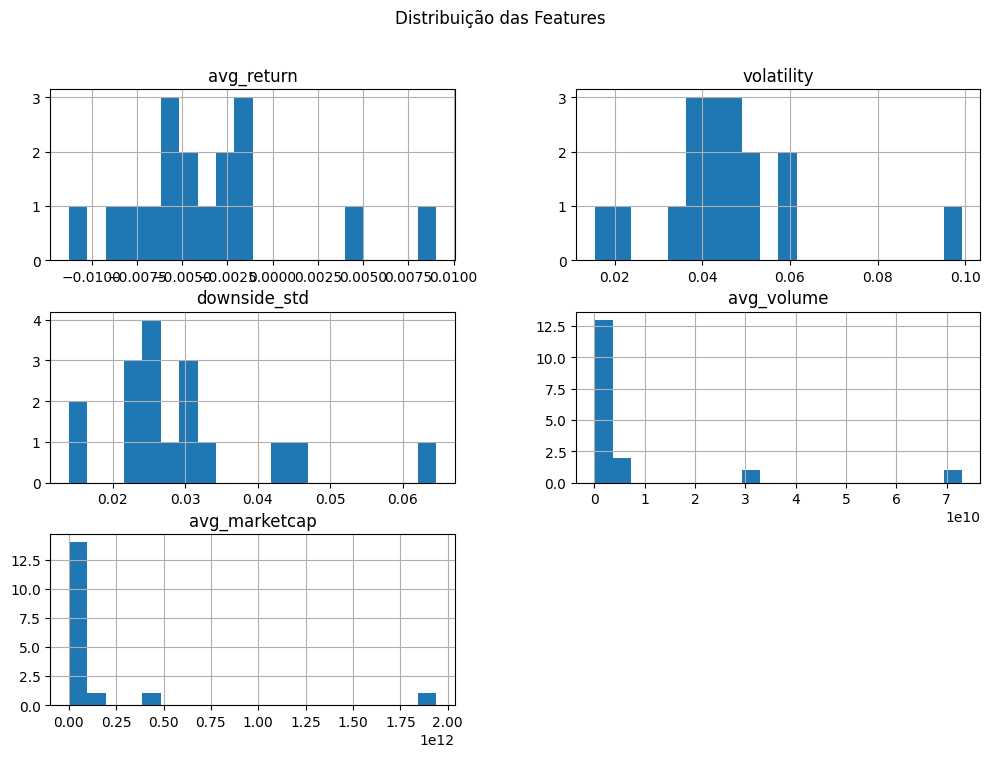

In [7]:
features.hist(figsize=(12,8), bins=20)
plt.suptitle("Distribuição das Features")
plt.show()

## Correlação entre as features

In [8]:
# evolução recente do risco (retorno absoluto)
features["abs_return"] = features["avg_return"].abs()

# volume log-normalizado
features["log_volume"] = np.log1p(features["avg_volume"])
features["log_volume"] = features["log_volume"] / features["log_volume"].max()

# market cap log
features["log_mc"] = np.log1p(features["avg_marketcap"])

## Salvando dataset processado
As features são usadas no notebook 04 (Clusterização).

In [9]:
output_path = "../data/processed/crypto_features.csv"
features.to_csv(output_path)

print("Arquivo salvo em:", output_path)
features

Arquivo salvo em: ../data/processed/crypto_features.csv


,avg_return,volatility,downside_std,avg_volume,avg_marketcap,abs_return,log_volume,log_mc
coin,,,,,,,,
bitcoin,-0.005534,0.023347,0.016404,7.308600e+10,1.940580e+12,0.005534,1.000000,28.294008
cardano,-0.011261,0.039155,0.024401,1.065984e+09,1.846044e+10,0.011261,0.830991,23.638896
chainlink,-0.007330,0.040841,0.031323,8.113048e+08,1.008031e+10,0.007330,0.820077,23.033850
cosmos,-0.004907,0.051917,0.045362,8.128961e+07,1.309557e+09,0.004907,0.728107,20.992954
dogecoin,-0.005686,0.041791,0.025010,2.030098e+09,2.477025e+10,0.005686,0.856743,23.932909
ethereum,-0.006826,0.035654,0.026060,3.228336e+10,3.926658e+11,0.006826,0.967336,26.696225
fartcoin,0.004591,0.099259,0.064656,1.263698e+08,2.851722e+08,0.004591,0.745744,19.468604
litecoin,-0.001777,0.052354,0.029508,8.370023e+08,7.105747e+09,0.001777,0.821324,22.684170
monero,0.009049,0.047481,0.030987,1.957161e+08,6.935486e+09,0.009049,0.763232,22.659917
